## World Happiness Score Dataset
##### Data Description
The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update.It ranks 155 countries on the basis of their happiness score.The happiness scores and rankings use data from the Gallup World Poll.The scores are based on answers to the main life evaluation question asked in the poll.The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia.The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country

### Importing the required libraries

In [335]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

### Importing the data

In [336]:
score=pd.read_csv('happiness_score_dataset.csv')

In [337]:
# Checking the first 5 rows of happiness score dataset.
score.head(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [338]:
# Checking the dimensions
score.shape

(158, 12)

In [339]:
# Checking the data types
score.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

So here we have 158 rows and 12 columns including target column and out of 12 columns, 2 columns are object or string datatype ,1 is interger and rest are float datatypes.

In [340]:
# Summary stastistics
score.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


So from summary statistics we can say that our data is not so skewed ,as the standard deviation is very low of all columns.The mean and median values of all columns is almost same,so there is a less probability of outliers pressence.

In [341]:
# Let's check the null values
score.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

We have zero null values in our dataset.

### Exploratory Data Analysis
First we are going to see the univariate analysis in which we are trying to find outliers and the distribution of data.

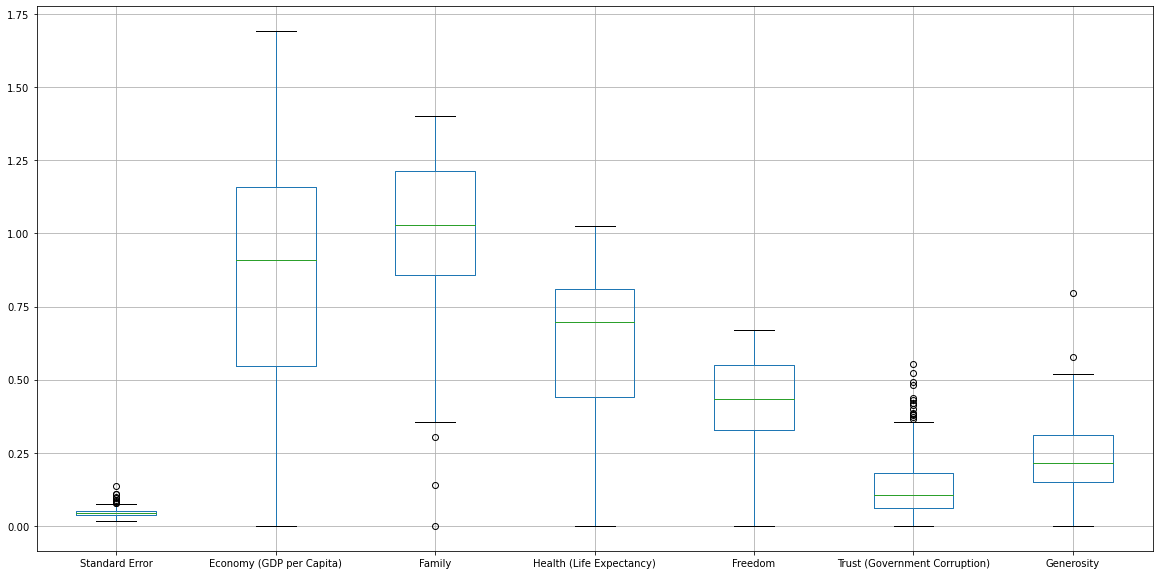

In [342]:
# Univariate Analysis
score.iloc[:,4:-1].boxplot(figsize=(20,12))
plt.subplots_adjust(bottom=0.25)
plt.show()

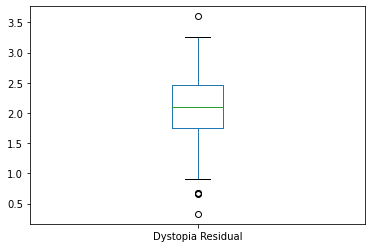

In [343]:
score['Dystopia Residual'].plot(kind='box')

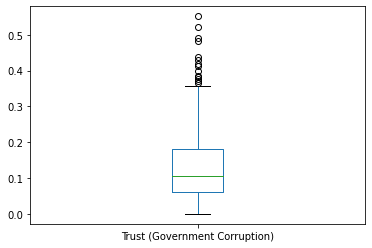

In [344]:
score['Trust (Government Corruption)'].plot(kind='box')

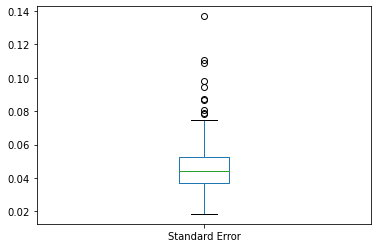

In [345]:
score['Standard Error'].plot(kind='box')

Here we see that there are not so much outliers.So we are going to left them untreated.
#### Bivariate Analysis

In [346]:
score.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

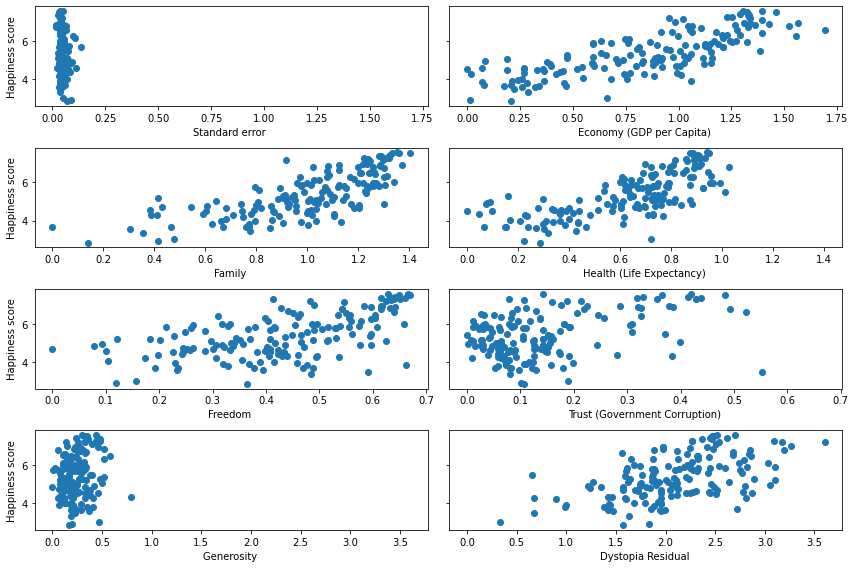

In [347]:
fig, axes = plt.subplots(nrows=4, ncols=2 ,figsize=(12,8),sharey='row', sharex='row')

axes[0,0].scatter(x=score['Standard Error'],y=score['Happiness Score'])
axes[0,0].set_xlabel("Standard error ")
axes[0,0].set_ylabel('Happiness score')

axes[0,1].scatter(x=score['Economy (GDP per Capita)'],y=score['Happiness Score'])
axes[0,1].set_xlabel("Economy (GDP per Capita) ")


axes[1,0].scatter(x=score['Family'],y=score['Happiness Score'])
axes[1,0].set_xlabel("Family ")
axes[1,0].set_ylabel('Happiness score')

axes[1,1].scatter(x=score['Health (Life Expectancy)'],y=score['Happiness Score'])
axes[1,1].set_xlabel("Health (Life Expectancy) ")


axes[2,0].scatter(x=score['Freedom'],y=score['Happiness Score'])
axes[2,0].set_xlabel("Freedom ")
axes[2,0].set_ylabel('Happiness score')

axes[2,1].scatter(x=score['Trust (Government Corruption)'],y=score['Happiness Score'])
axes[2,1].set_xlabel("Trust (Government Corruption) ")


axes[3,0].scatter(x=score['Generosity'],y=score['Happiness Score'])
axes[3,0].set_xlabel("Generosity ")
axes[3,0].set_ylabel('Happiness score')

axes[3,1].scatter(x=score['Dystopia Residual'],y=score['Happiness Score'])
axes[3,1].set_xlabel("Dystopia Residual ")


fig.tight_layout()

Using the bivariate plotting we can see that some of the variables are in positive linear relationship with the happiness scoring like GDP ,family,freedom.These are the favourable conditions which will help a country in scoring a good happiness value and the variable like government corruption shows that as the corruption in government of a country increases then country will face low happiness scoring.

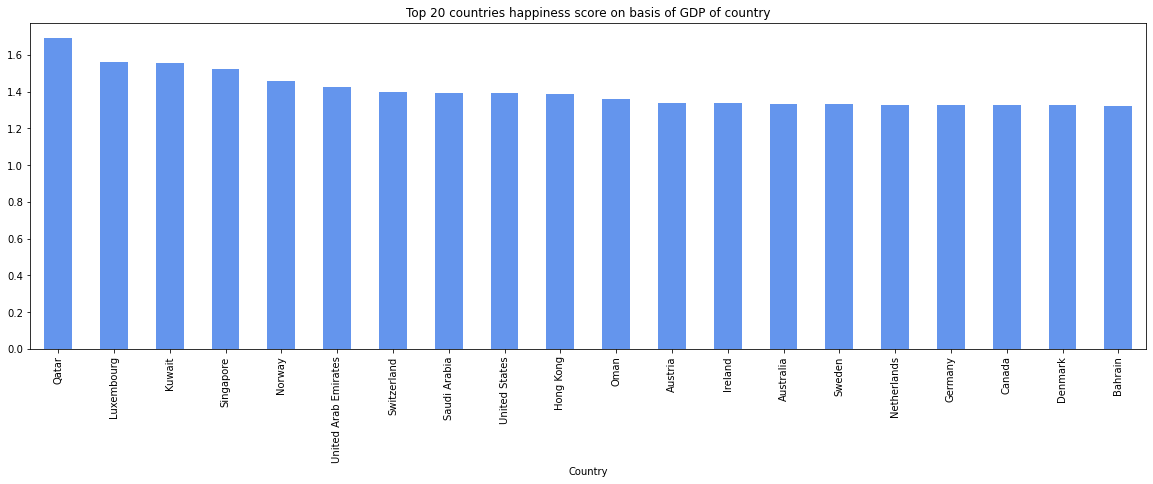

In [348]:
# Check the top 20 countries based on GDP of that country

score.groupby('Country')['Economy (GDP per Capita)'].max(
     ).sort_values(ascending=False).head(20).plot(kind='bar',figsize=(20,6),color='cornflowerblue')
plt.title("Top 20 countries happiness score on basis of GDP of country")
plt.show()

From the graph we can see that `Qatar`,`Luxenbourg`,`Kuwait` are on the top of countries whose GDP are heighest.

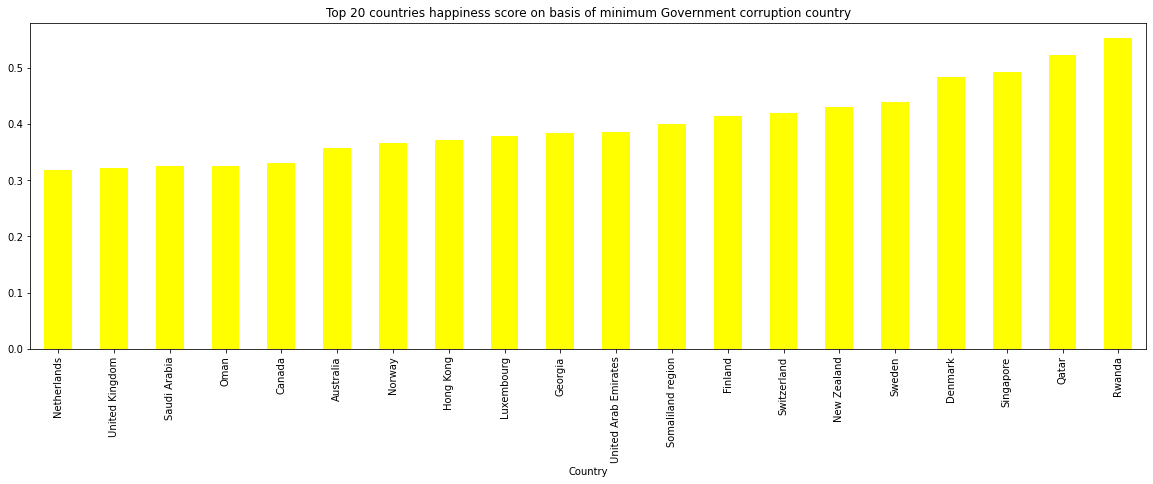

In [349]:
# Top 20 countries with minimum Government corruption

score.groupby('Country')['Trust (Government Corruption)'].min(
     ).sort_values(ascending=True).tail(20).plot(kind='bar',figsize=(20,6),color='yellow')
plt.title("Top 20 countries happiness score on basis of minimum Government corruption country")
plt.show()

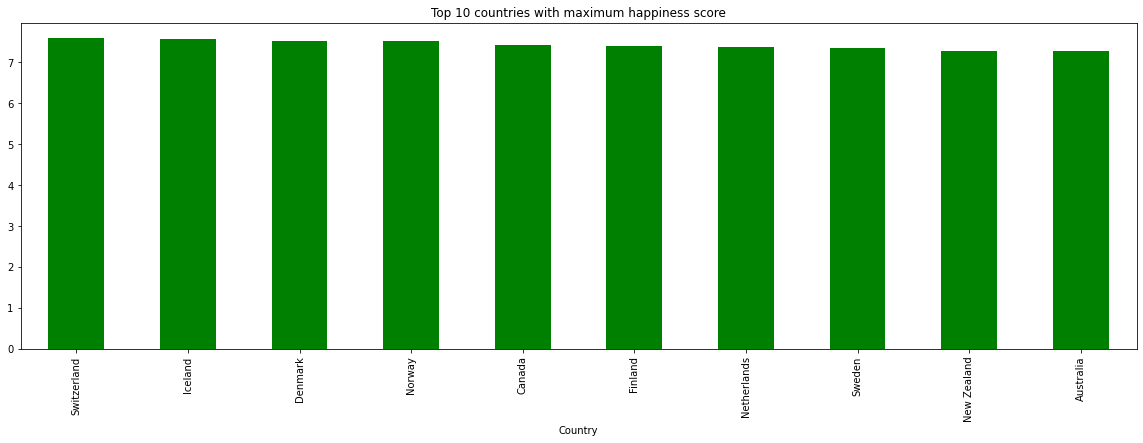

In [350]:
score.groupby('Country')['Happiness Score'].max().sort_values(ascending=False).head(10).plot(
kind='bar',figsize=(20,6),color='green')
plt.title("Top 10 countries with maximum happiness score")
plt.show()

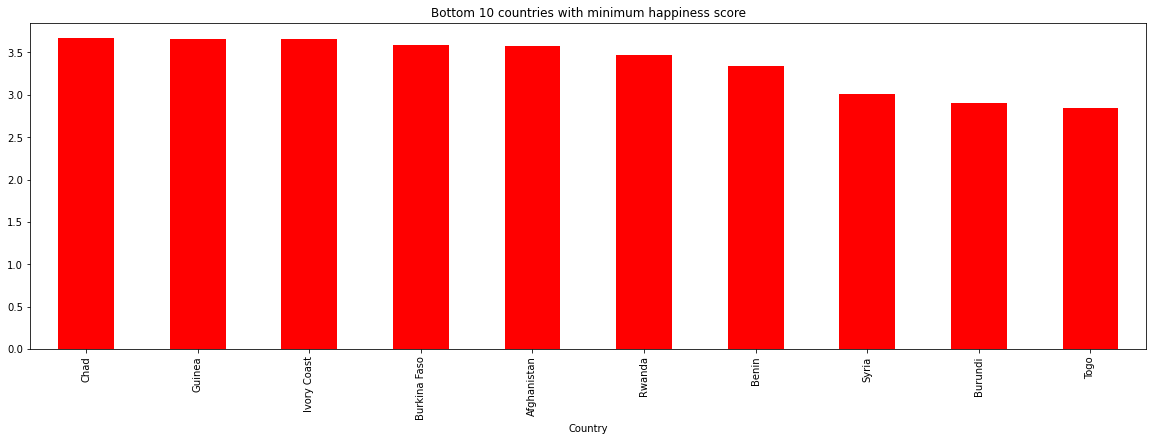

In [351]:
score.groupby('Country')['Happiness Score'].min().sort_values(ascending=False).tail(10).plot(
kind='bar',figsize=(20,6),color='red')
plt.title("Bottom 10 countries with minimum happiness score")
plt.show()

The graph shows that `Switzerland`,`Iceland`,`Denmark`,`Norway`,`Canada` scores highest in the index of happines and `Togo`,`Burundi`,`Syria` these countries are on the bottom of happiness score.

### Multivariate analysis

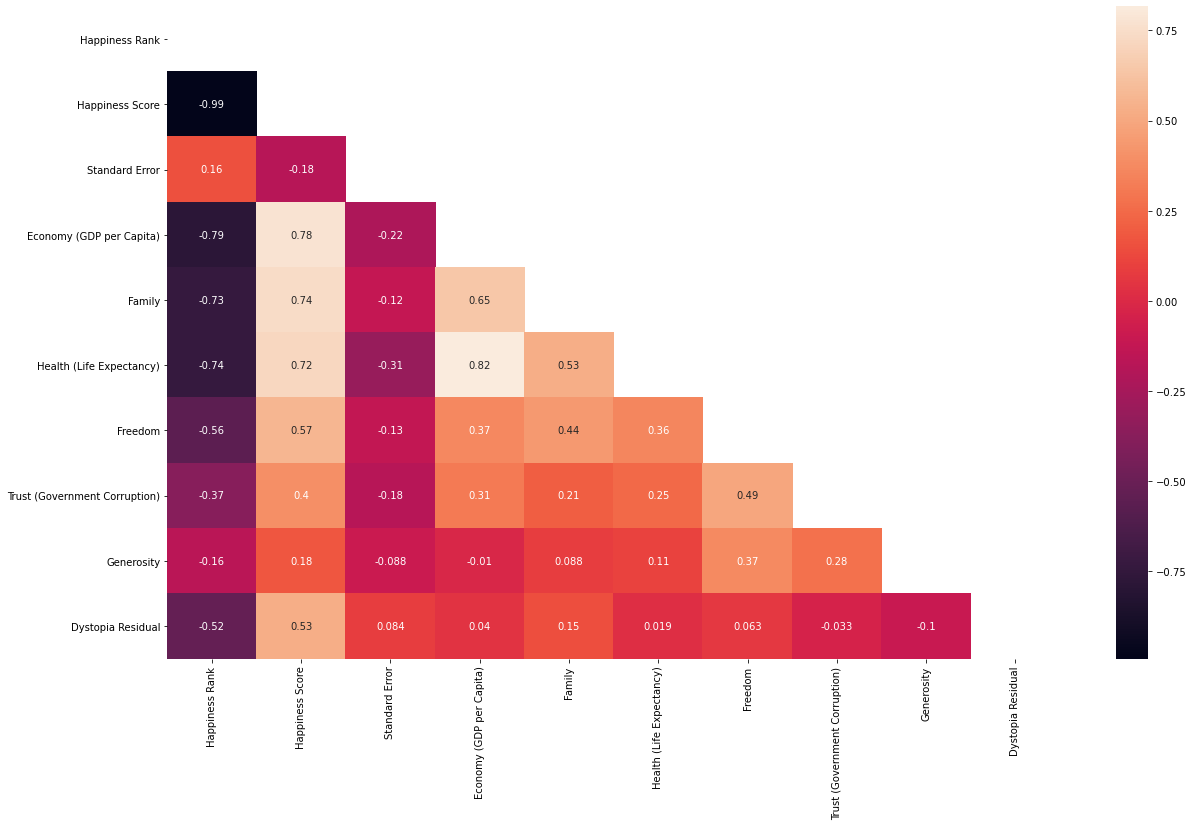

In [352]:
plt.figure(figsize=(20,12))
matrix = np.triu(score.iloc[:,1:].corr())
sns.heatmap(score.iloc[:,1:].corr(),annot =True,mask=matrix)

In [353]:
corr_matrix= score.corr()
corr_matrix['Happiness Score'].sort_values(ascending=False)

Happiness Score                  1.000000
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Dystopia Residual                0.530474
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Standard Error                  -0.177254
Happiness Rank                  -0.992105
Name: Happiness Score, dtype: float64

From the above graph and the  table we can clearly see that happiness score is highly negative related to happiness rank as the happiness score increases ranking of happiness decrease and some of the columns are posively correlated with happiness score which means that the change in that variables will directly change the happiness scoring.If it is positive change that the happiness scoring will increase.

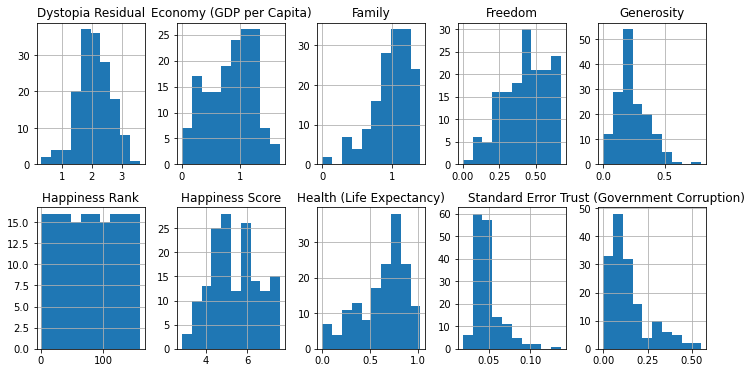

<Figure size 432x288 with 0 Axes>

In [354]:
# Let's check the skewness using the histogram
score.hist(layout=(2,5),figsize=(12,6))
plt.show()
plt.tight_layout()

Through histogram we can see a little skewness is present in dataset. So let's check the how much skewness is present.

In [355]:
score.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

Some of the columns are having skewness value greater than 0.5 .So there is need to deal with the skewness before sending the data for testing and training purpose.

In [356]:
from sklearn.preprocessing import PowerTransformer
trans=PowerTransformer(method='yeo-johnson')
score[['Standard Error']] = trans.fit_transform(score[['Standard Error']])
score[['Family']] = trans.fit_transform(score[['Family']])
score[['Health (Life Expectancy)']] = trans.fit_transform(score[['Health (Life Expectancy)']])
score[['Trust (Government Corruption)']]=trans.fit_transform(score[['Trust (Government Corruption)']])
score[['Generosity']] = trans.fit_transform(score[['Generosity']])

In [357]:
score.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                  -0.020092
Economy (GDP per Capita)        -0.317575
Family                          -0.169651
Health (Life Expectancy)        -0.183181
Freedom                         -0.413462
Trust (Government Corruption)    0.185965
Generosity                       0.013320
Dystopia Residual               -0.238911
dtype: float64

Now we have removed the skewed values.

In [358]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
score['Region']=encoder.fit_transform(score['Region'])
score['Country'] = encoder.fit_transform(score['Country'])

In [359]:
score.head(6)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,-0.972226,1.39651,1.669206,1.491765,0.66557,1.773991,0.622391,2.51738
1,58,9,2,7.561,0.309350,1.30232,2.012132,1.532348,0.62877,0.315993,1.480995,2.70201
2,37,9,3,7.527,-1.062017,1.32548,1.739586,1.085223,0.64938,1.906792,0.927973,2.49204
3,105,9,4,7.522,-0.503610,1.45900,1.553118,1.147600,0.66973,1.624007,0.964080,2.46531
4,24,5,5,7.427,-0.823548,1.32629,1.501726,1.270179,0.63297,1.503484,1.592224,2.45176
5,45,9,6,7.406,-1.273607,1.29025,1.475110,1.170799,0.64169,1.759232,0.127130,2.61955


###  Separating independent and dependant variables

In [360]:

x = score.drop(columns=['Happiness Score','Country','Happiness Rank'])

y= score[['Happiness Score']]

We separated the independent and dependent variables.

`x --> independent variables`

`y --> dependent variables`

In [361]:
# Let's check the shape of the independent and dependent variables
print("independent variable shape : ",x.shape)
print("\n")
print("dependent variable shape :",y.shape)

independent variable shape :  (158, 9)


dependent variable shape : (158, 1)


Transforming the categorical data into the numerical data so that model can easily understand the data provided to it.

In [362]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

In [363]:
x=pd.DataFrame(data=x,columns=['Region', 'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'])
x.head()

,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.300256,-0.972226,1.369621,1.669206,1.491765,1.577438,1.773991,0.622391,0.758258
1,1.300256,0.309350,1.135226,2.012132,1.532348,1.332456,0.315993,1.480995,1.092857
2,1.300256,-1.062017,1.192861,1.739586,1.085223,1.469659,1.906792,0.927973,0.712335
3,1.300256,-0.503610,1.525130,1.553118,1.147600,1.605131,1.624007,0.964080,0.663893
4,-0.040302,-0.823548,1.194876,1.501726,1.270179,1.360416,1.503484,1.592224,0.639337


After encoding categorical data into numerical data we saw that whole data is not on same scale,this will create biased among the variables.So using the StandardScaler technique we scaled the left columns.

### Sending data for training and testing

In [ ]:

from sklearn.model_selection import train_test_split

r2=0
max_r=0
for i in range(0,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    score=r2_score(y_test,pred)
    if score>r2:
        score=r2
        max_r=i
print("Best accuracy is -",r2,"and random state is -",max_r)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=399)
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
r2 = r2_score(y_test,pred)
print(r2)

In [ ]:
mean_squared_error(y_test,pred)

In [ ]:
mean_absolute_error(y_test,pred)

In [ ]:
lr.coef_

In [ ]:
lr.intercept_

In [ ]:
lr.score(x_test,y_test)

In [ ]:
from sklearn.linear_model import Lasso ,Ridge

In [ ]:
lasso=Lasso(alpha=0.1)
lasso.fit(x_train,y_train)
pred_l=lasso.predict(x_test)
r2_score(y_test,pred_l)

In [ ]:
ridge=Ridge(alpha=0.25)
ridge.fit(x_train,y_train)
pred_r=ridge.predict(x_test)
r2_score(y_test,pred_l)

In [ ]:
# Saving the file
import joblib
joblib.dump(ridge,"ridge.pkl")